# Setup

Data are from Bluebell: `/mnt/data1/chris/projects/ileal-cd/analysis/cellranger/cr_count_2021-09-24` (CD-1, CD-2, CD-3, CD-4, where CD-1 & -2 are inflamed & uninflamed samplesm, respectively, from record_id FC_Hu_IL2, and CD-3 & -4 are inflamed & un-inflamed samples from FC_Hu_IL3). 

I stored the filtered matrices under four directories named with the convention "/home/asline01/projects/data/ileal-cd/CD-#/filtered_feature_bc_matrix" (where # is 1-4). For example, `/mnt/data1/chris/projects/ileal-cd/analysis/cellranger/cr_count_2021-09-24/outs/filtered_feature_bc_matrix` on Bluebell is stored locally in `/home/asline01/projects/data/ileal-cd/CD-1/filtered_feature_bc_matrix`.

Change the variable `ddd` below to your directory. If you download more subjects/samples, store using the same convention described above, and change the variable `subs` below so that the code includes those directories.

In [1]:
%load_ext autoreload
%autoreload 2

import os
from corescpy import Omics
import pandas as pd

# CHANGE THIS TO YOUR DIRECTORY AND SUB-DIRETORIES HOLDING DATA
ddd = os.path.join(os.path.expanduser("~"),
                   "corescpy/examples/data/crispr-screening/")
subs = ["HH04", "HH05", "HH06"]  # sample sub-directories with bc matrix files

file_path = dict(zip(subs, [os.path.join(ddd, x, "filtered_feature_bc_matrix")
                            for x in subs]))
kws_harmony = {"plot_convergence": True,
               "random_state": 1618}
kws_umap = {"min_dist": 0.3}
kws_init = {"assay": None, "assay_protein": None,
            "col_gene_symbols": "gene_symbols",
            "col_cell_type": "majority_voting",
            "col_condition": None,
            "key_control": None,
            "key_treatment": None}
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10,
                      "min_disp": 0.5, "flavor": "cell_ranger"},
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15],
          "cell_filter_ngene": [3, None], "cell_filter_ncounts": [3, None],
          "gene_filter_ncell": [3, None], "regress_out": None,
          "kws_scale": "log", "kws_umap": kws_umap}
kws_cluster = {"method_cluster": "leiden", "kws_umap": kws_umap,
               "kws_neighbors": None, "kws_cluster": {},
               "kws_pca": {"use_highly_variable": True},
               "resolution": 0.5, "n_comps": None}

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Single-Cell Integrated Object Initialization



<<< INITIALIZING OMICS CLASS OBJECT >>>




col_gene_symbols="gene_symbols"
col_cell_type="majority_voting"
col_sample_id="unique.idents"
col_batch="unique.idents"
col_subject=None
col_condition=None
col_num_umis=None



key_control=None
key_treatment=None


<<< INITIALIZING OMICS CLASS OBJECT >>>




col_gene_symbols="gene_symbols"
col_cell_type="majority_voting"
col_sample_id="unique.idents"
col_batch="unique.idents"
col_subject=None
col_condition=None
col_num_umis=None



key_control=None
key_treatment=None


<<< LOADING 10X FILE /home/elizabeth/elizabeth/corescpy/examples/data/crispr-screening/HH04/filtered_feature_bc_matrix >>>
dsfasfda AnnData object with n_obs × n_vars = 22087 × 36717
    var: 'gene_ids', 'feature_types'


Cell Counts: Initial


Observations: 22087



Gene Counts: Initial

Empty DataFrame
Columns: [index, gene_ids, feature_types]
Index: []





 AnnData object with n_obs × n_vars = 22087 × 36717
    var: 'gene_ids', 'feature_types'
    layers: 'counts'
None




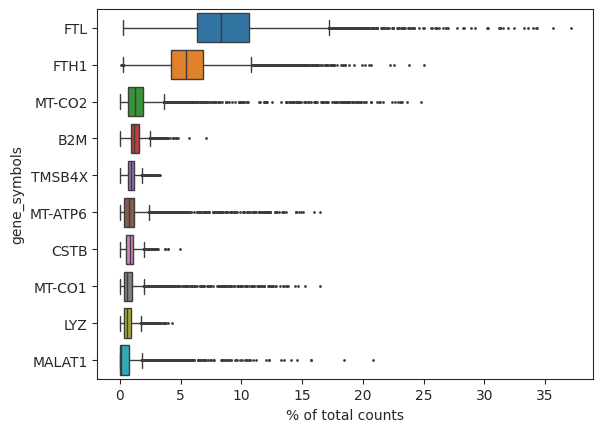

dsfasfda AnnData object with n_obs × n_vars = 22087 × 36717
    obs: 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types'
    layers: 'counts'


Cell Counts: Initial


Observations: 22087



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'feature_types' as categorical


None n_genes_by_counts
None pct_counts_mt
None pct_counts_ribo


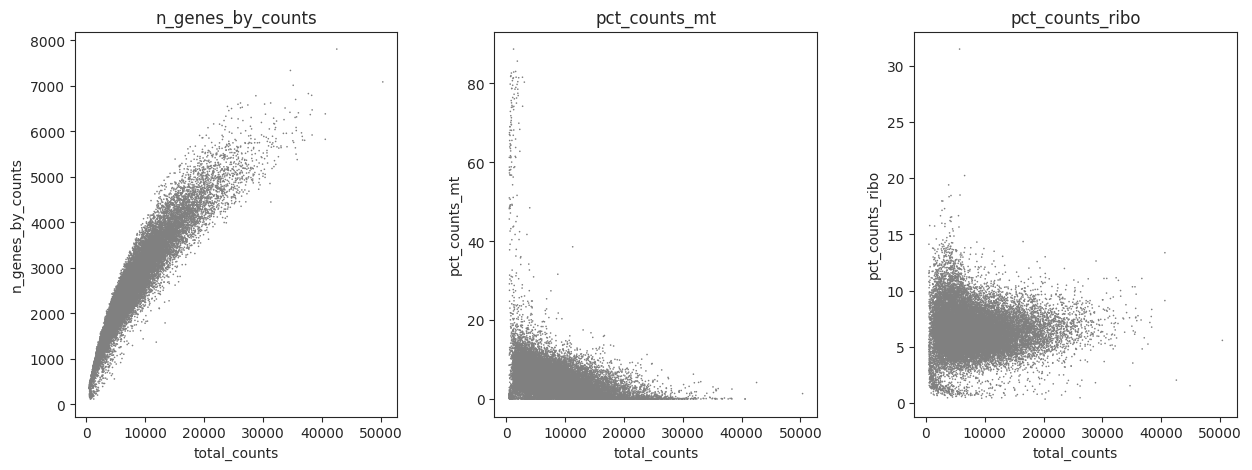


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>
dsfasfda AnnData object with n_obs × n_vars = 22087 × 36717
    obs: 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'counts'


Cell Counts: Post-Basic Filter


Observations: 22087



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%                0.0     0.000000           0.000000              94.738987   
50%               23.0     0.001041           0.001041              99.895866   
75%             1162.0     0.057409           0.055822             100.000000   

   

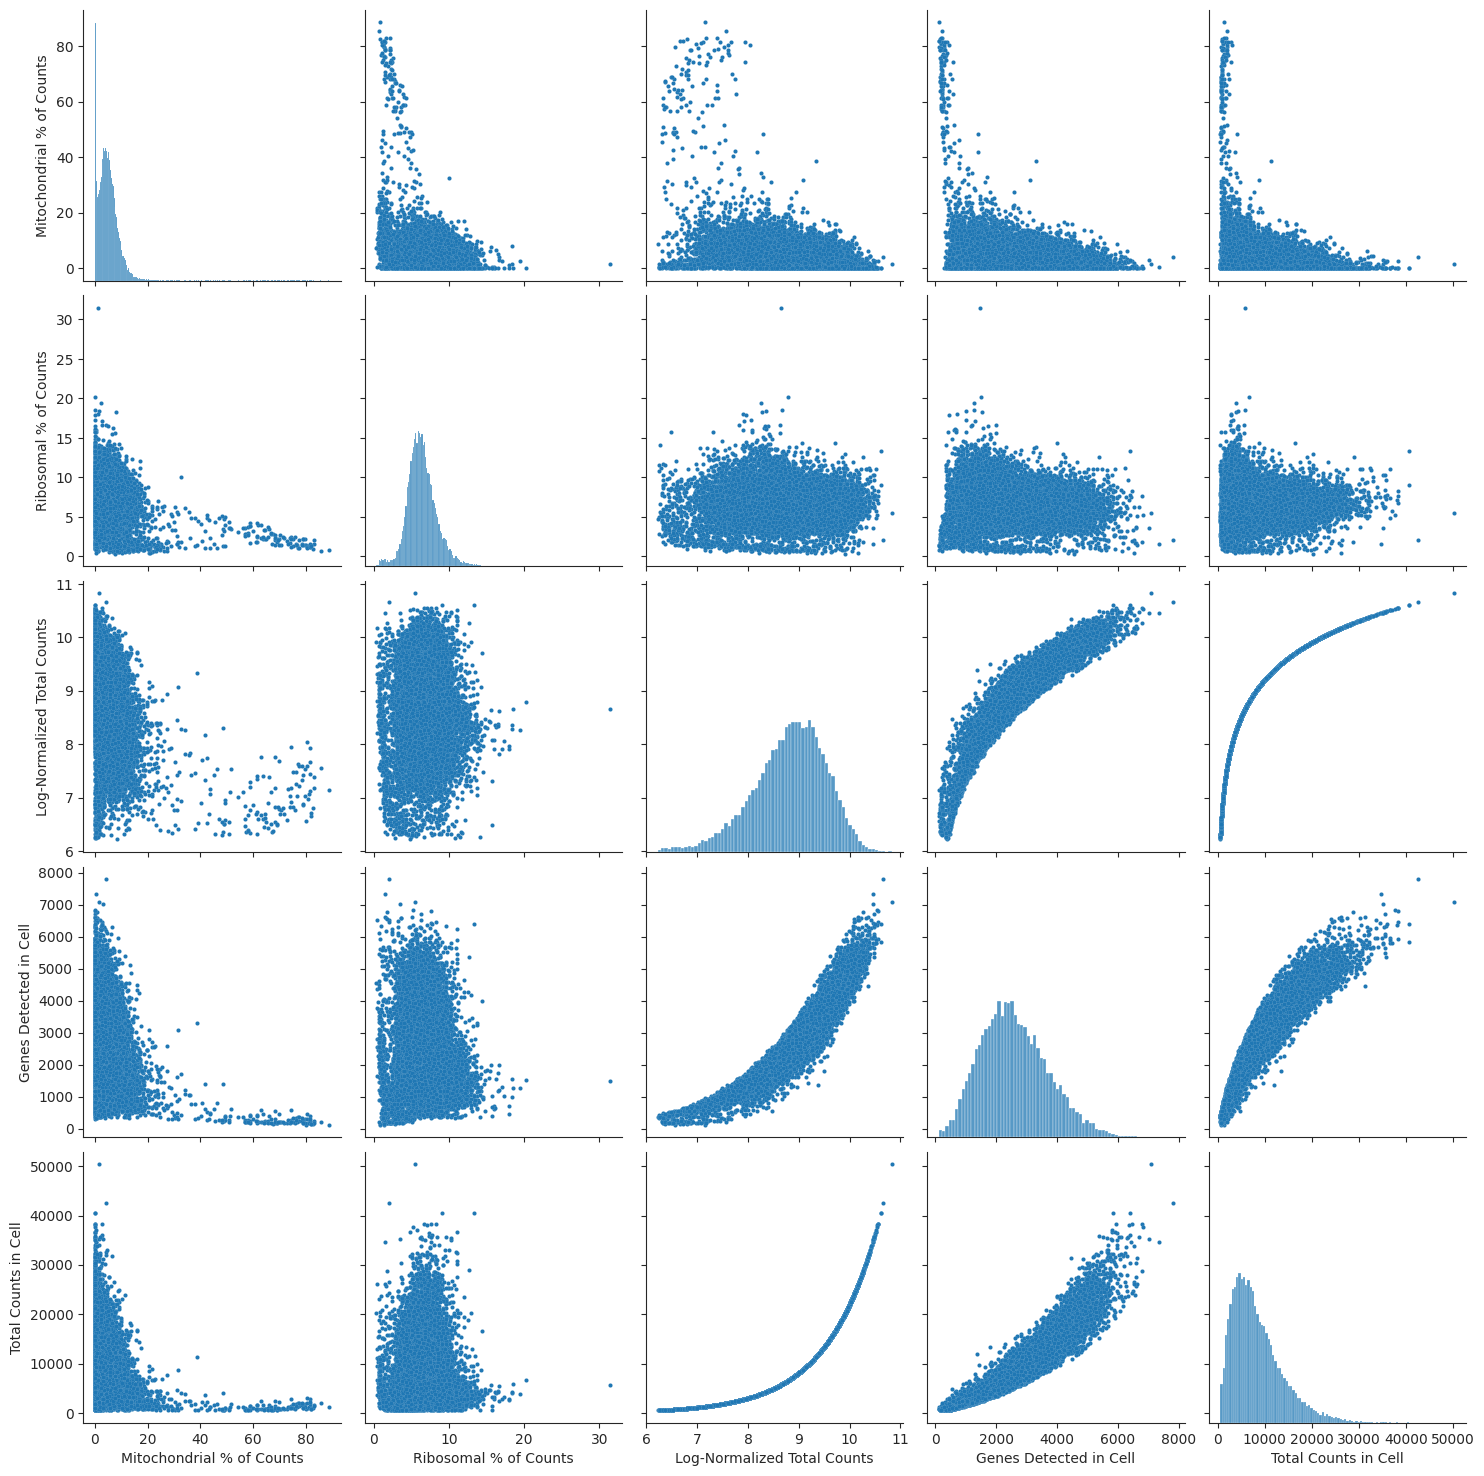

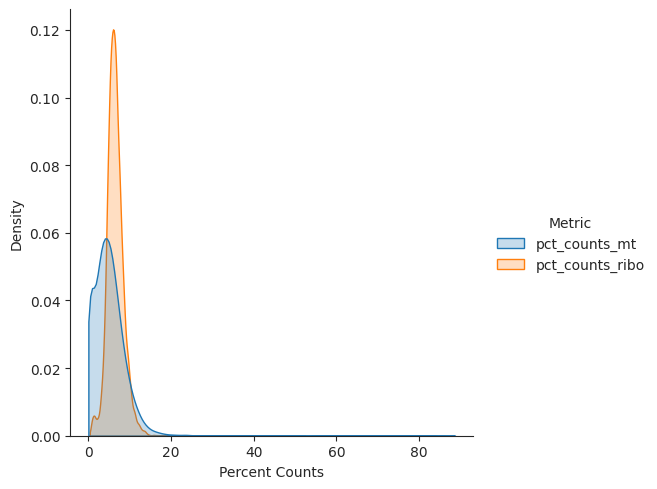

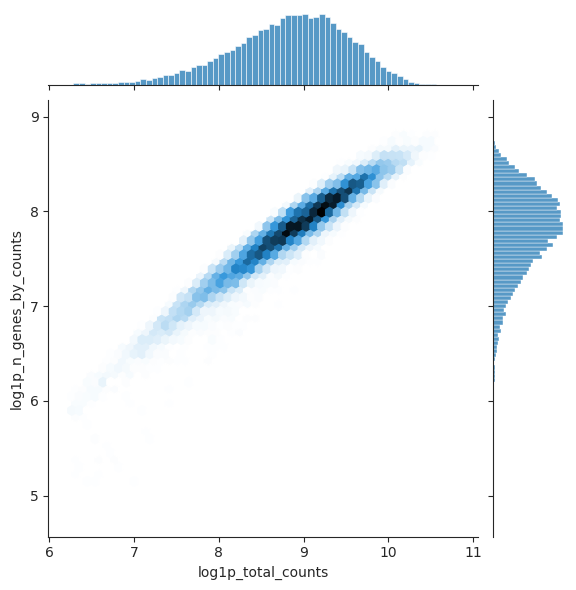

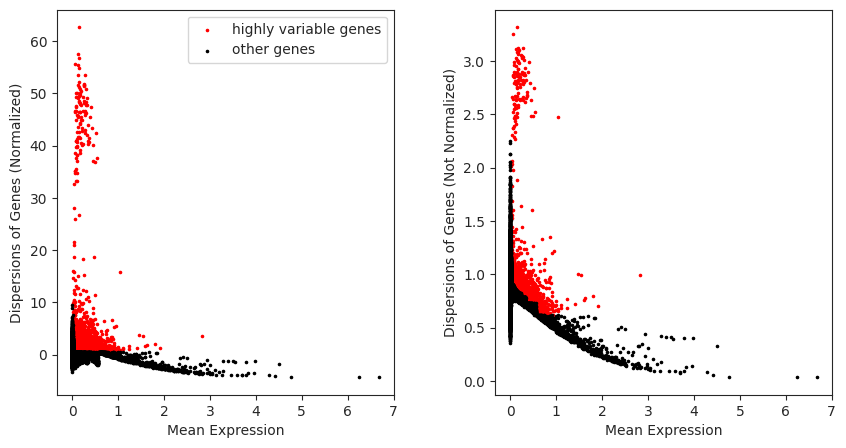


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Scaling => `.X` & scaled layer...
dsfasfda AnnData object with n_obs × n_vars = 22087 × 24004
    obs: 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'
    layers: 'counts', 'log1p', 'scaled'


Cell Counts: Post-Processing


Observations: 22087



Gene Counts: Post-Processing

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%               26.0     0.001222           0.001222              86

TypeError: scanpy.preprocessing._pca.pca() got multiple values for keyword argument 'n_comps'

In [2]:
self = Omics(file_path, **kws_init, kws_multi=dict(
    kws_pp=kws_pp, kws_cluster=kws_cluster, kws_harmony=kws_harmony))

# Clustering & Annotations

Clustering was conducted in the individual objects in `cr.pp.create_object_multi()`, but we want to re-do QC and clustering in the overall sample.

Clustering object should have an attribute `._integrated` that signals the clustering method to set `kws_pca=False` so that the Harmony-adjusted PCA created during integration (rather than a newly-calculated one) will be used.

In [ ]:
self.cluster(**kws_cluster)

## Annotations

Now, annotate with CellTypist.

In [ ]:
_ = self.annotate_clusters("Immune_All_High.pkl")

# Plots

Create a variety of plots visualizing gene expression, cell clusters, etc.

If you want to focus on a cell type categorization column other than 

You can often specify splitting/color-coding columns to be different across different plots by specifying a different `col_cell_type` argument in their respective `kws_<PLOT>` arguments (e.g., `kws_umap="predicted_labels"`).

By specifying `color` in `kws_umap`, you can create an additional UMAP colored by a column other than the cell type. If you also specified `cell_types_circle` in the main list of arguments, the UMAP will be colored by `kws_umap["color"]` (or the cell type column, if color isn't specified), and the cell types listed in `cell_types_circle` will be circled on it. 

In [ ]:
self.adata.obs.loc[self.adata.obs[self._columns["col_sample_id"]].isin(
    ["CD-1", "CD-3"]), "inflam_status"] = "Inflamed"
self.adata.obs.loc[self.adata.obs[self._columns["col_sample_id"]].isin(
    ["CD-2", "CD-4"]), "inflam_status"] = "Un-Inflamed"

In [ ]:
clus = list(self.rna.obs["predicted_labels"].sample(2))  # clusters to circle
kgh = list(pd.Series(self.rna.var_names).sample(2))  # gene labels: highlight
figs = self.plot(genes=16,  # or could specify list of gene names
                 col_cell_type="majority_voting",
                 cell_types_circle=clus,  # list cell types to circle on UMAP
                 kws_gex_violin=dict(scale="area", height=10),
                 genes_highlight=None,  # could be genes names to highlight
                 kws_umap=dict(col_cell_type="predicted_labels",
                               color="inflam_status"))  # for UMAP